<a href="https://colab.research.google.com/github/lisatwyw/AI4SocialGood/blob/main/XAI_climate_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

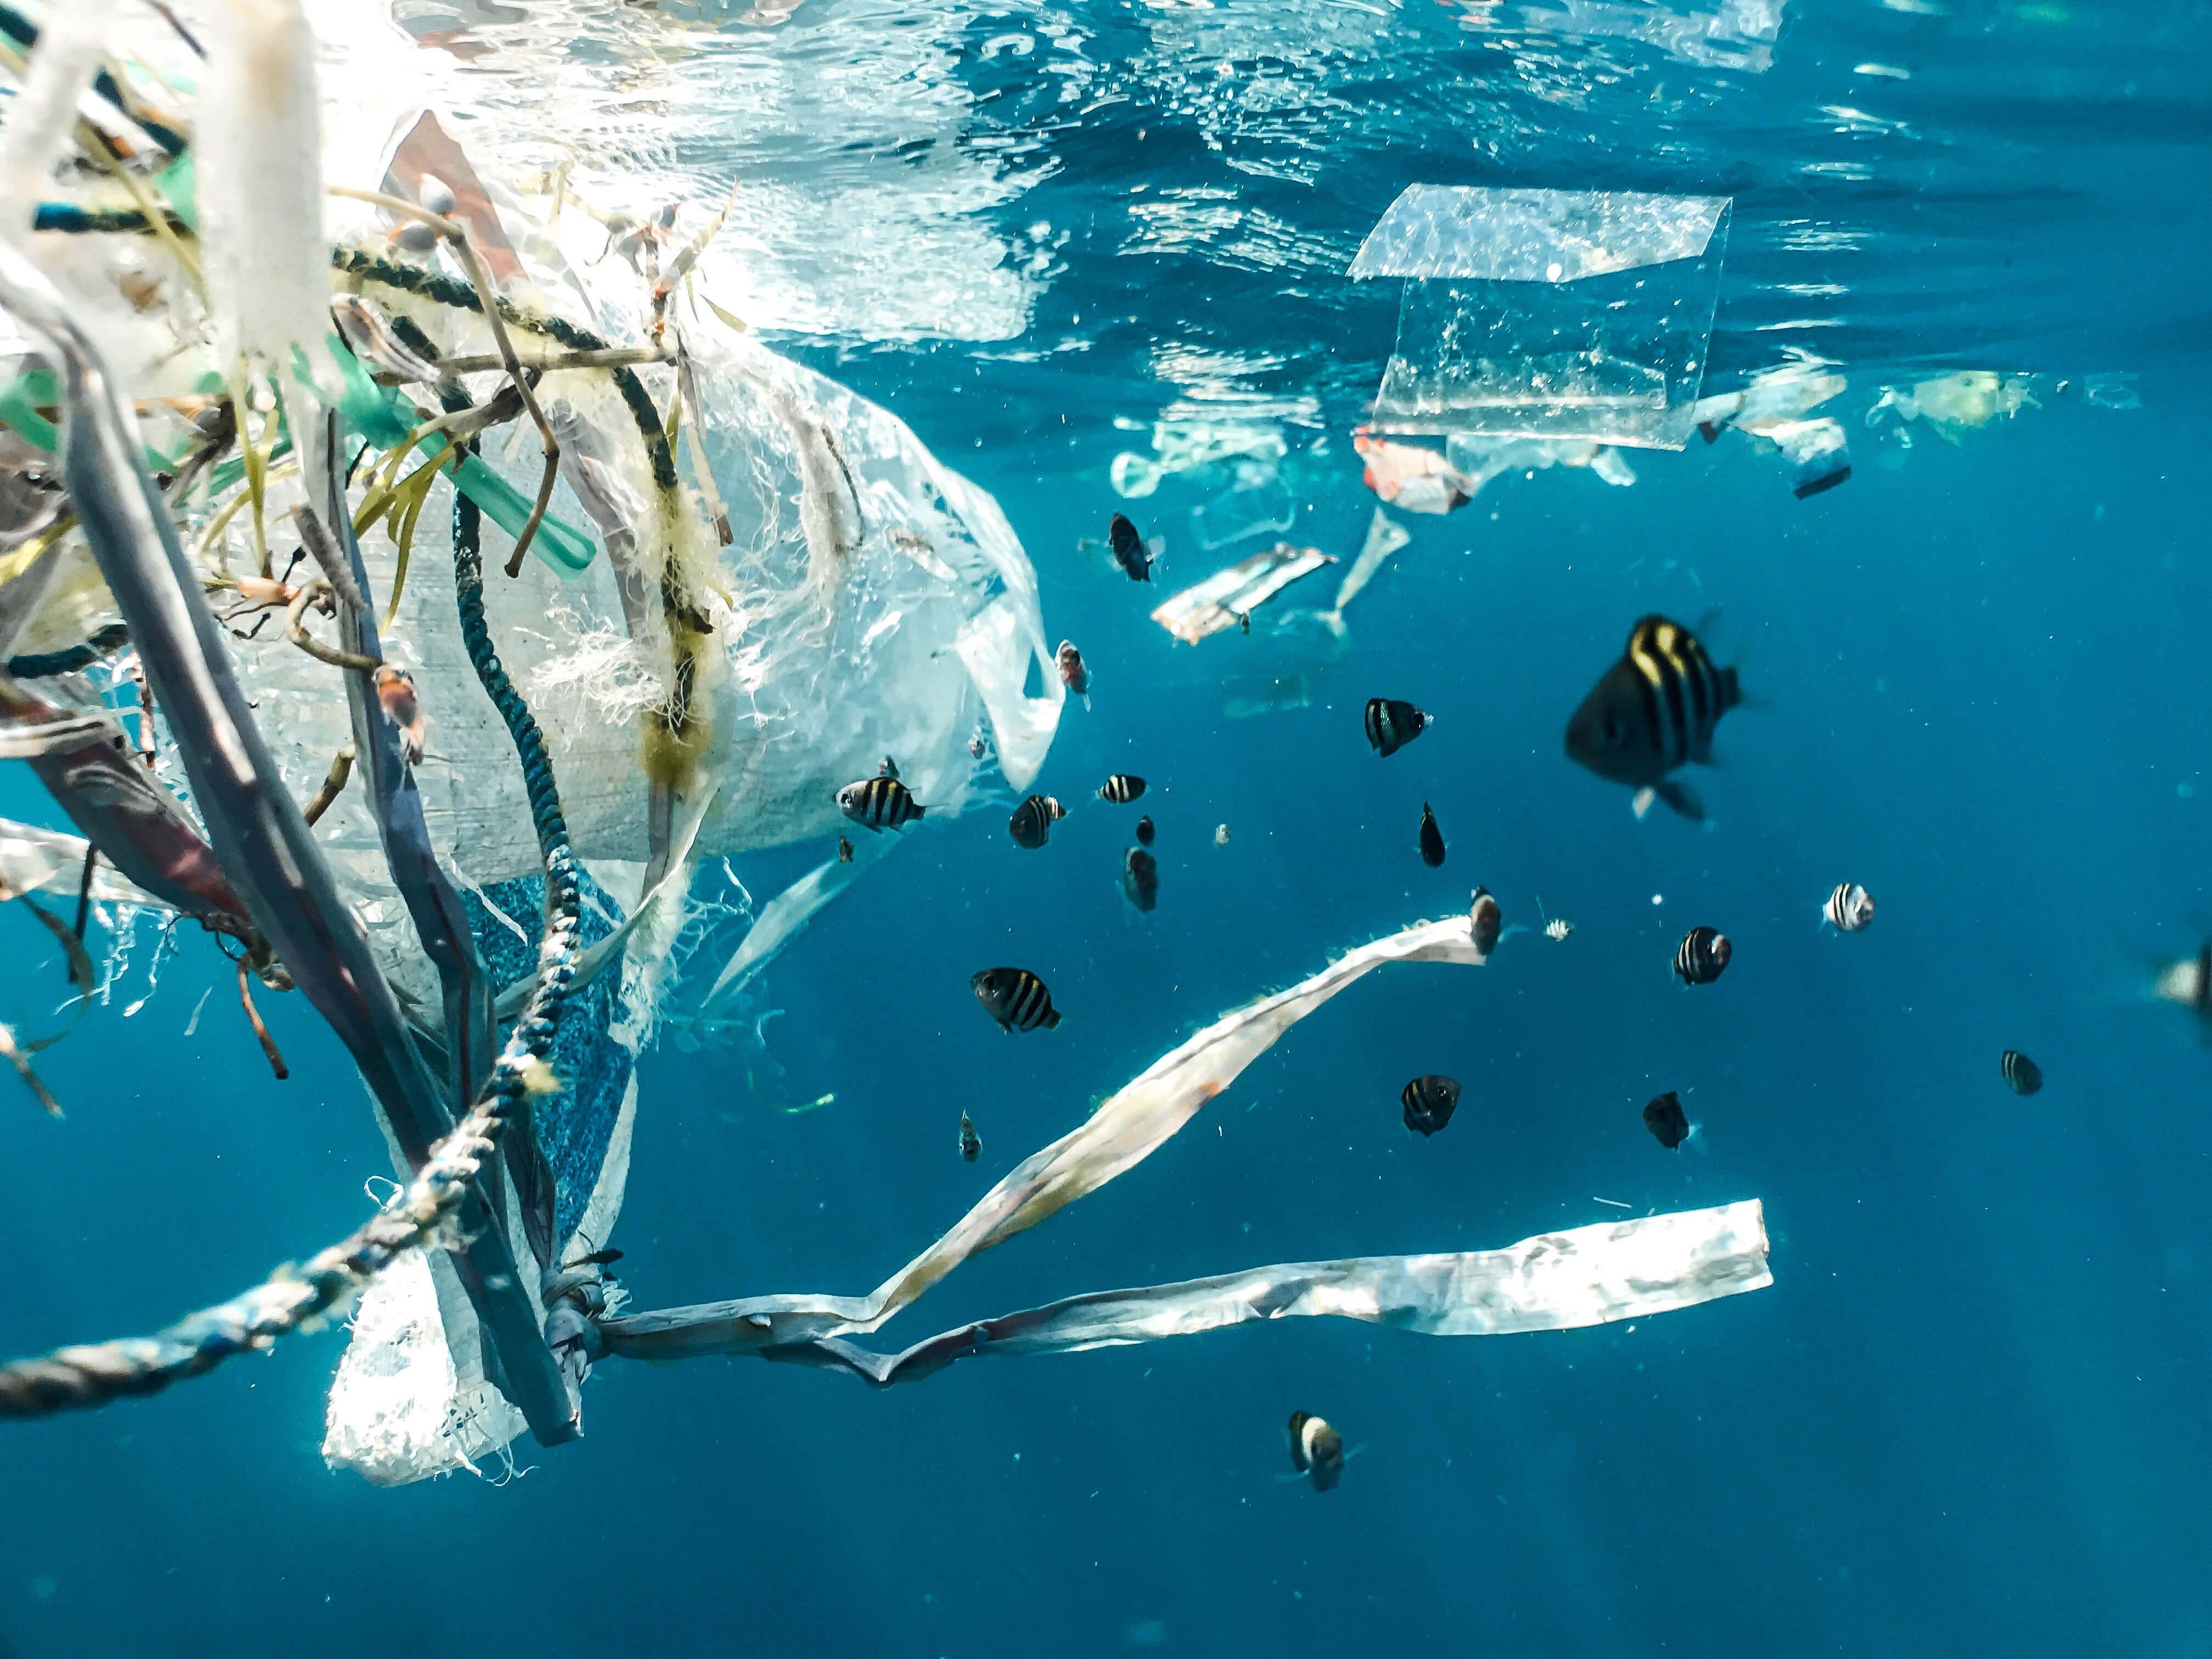

In [ ]:
from IPython.display import Image
Image('/kaggle/input/unsplash-plastic-ocean/naja-bertolt-jensen-unsplash.jpeg')

Image source: freepik


# Slowing the ticking clock for Planet Earth with climate research,  machine learning and explainable AI

*Keywords: pollution; climate models;  historical climate data; time-series; machine learning; explainable artificial intelligence*



## Prelude

About one million tonne of contaminated wastewater from Fukushima is in the process of being dumped into the open oceans, amidst concerns raised by scientists [(Nogrady 2023)](#nature) and ongoing public protests both within and outside Japan [(Associated Press, July 2023)](#korea).

Environmental advocates protest that the ocean is owned by no single human civilization, but co-shared by all living creatures on this planet. Unfortunately, helpless sea animals cannot speak for themselves [(Xu et al, 2021)](#xu).

Other protestors are concerned about the impact to fishing industries. And many are concerned about health hazards.


At a panel discussion, Professor Richmond, a marine biologist at the University of Hawaii at Manoa and four other scientists were convened to advise on the concerns and reported to *Nature* that there were unanswered questions about tritium and carbon-14, some of the 64 radioactive elements that pose threats to human health.

> The concept of dilution as the solution to pollution has demonstrably been shown to be false. The very chemistry of dilution is undercut by the biology of the ocean.

As living organisms consume other contaminated organisms, the tritium could concentrate in the food web.

> Has it been shown to public's satisfaction that the dump will be safe for ocean and human health?

Professor Richmond answers “No” to the above question [(Nogrady 2023)](#nature). German researchers also echoed [(BenDriss et al, 2022)](#crab):

> The lack of transparency in reporting dose, dose rate and duration of exposure, makes it inaccurate to evaluate ionizing radiation efects in aquatic invertebrates

Likewise, when discussing how the [1986 Chernobyl nuclear accident](https://www.forbes.com/sites/davidnikel/2019/06/08/chernobyl-33-years-on-radiation-still-impacts-scandinavian-farmers/?sh=79cdce24949f) still impacts Scandinavian farmers, the [Swedish Radiation Safety Agency](https://www.forbes.com/sites/davidnikel/2019/06/08/chernobyl-33-years-on-radiation-still-impacts-scandinavian-farmers/?sh=79cdce24949f) warns:

> People don't have to worry unless they have a diet heavy on specific mushrooms, reindeer, game and lake fish...


Besides water pollution, our Planet Earth has been dealing with few hundred million metric tons of carbon pollution from wars around the globe. It has also been conjectured that global warming [(Peri et al., 2019)](#global_warming), [(Abram et al., 2021)](#australia_fire) renders enormous and intense wildfires inevitable and thus becoming more frequent each year. The list goes on with dozen more examples of warming temperatures leading to Amazon deforestation, Arctic permafrost thaw, and pine beettle outbreaks...

<br>
<div style="clear: both">
<img src="https://img.freepik.com/premium-photo/bird-stands-pile-garbage-front-city-skyline_874904-4.jpg?w=1060" alt="Bird stands on a pile of garbage in front of city skyline." width="800"/><p>Image source: freepik</p>
</div>



# Introduction

Pollution, "the unwanted waste of human origin released to air, land, water, and the ocean without regard for cost or consequence",  has caused 9 million premature deaths just in 2019 [(Fuller et al., 2022)](#pollution_update).  

As the authors remarked in their *Lancet* update review, exposure to toxic chemicals during prenatal and early postnatal  periods is shown to be associated with increased incidence rates of many types of cancer and reproductive diseases later in human life [(Fuller et al., 2022)](#pollution_update).  Toxic pollutants (e.g. perfluoroalkyl acids) have also been shown to be associated with reduced antibody responses to vaccines and increased severity of COVID-19 infections.

These are only a few snapshots of the harmful impacts pollution has done to humans, and the harm done to animals is unthinkable.

As one step towards pollution control, research in pollution and climate changes are urgently needed to develop sustainable action plans.

Pollution and climate change control are intertwined so the two areas are often studied together [(Manisalidis et al. 2020)](#review).  

To understand the human-caused drivers and their negative impact on climate change, Labe et al. [(2021)](#labe) proposed to use neural networks and visualization tools to examine regional affects and found that aerosols emitted in the past two decades have increased the temperature trends in specific parts of the world, predominantly over the North Atlantic Ocean.

This is especially concerning due to the risk of crossing the **critical climate thresholds**, the times at which large changes in the climate system will be activated, leading to irreversible consequences to our planet and all of its living creatures [(Lenton, T. M., 2021)](#tip).  

Climate research is best tackled with time-series data and analyses. Here, in this report, we examine how time-series analysis, **machine learning (ML)**, **explainable artificial intelligence (XAI)**, and latest advances in pollution research may slow down the climate countdown. Through the lens of climate and environmental science, this report aims to:
- Raise reader's attention on pollution and the importance of climate actions we should take;
- Review state-of-the-art time-series analysis methods (starting from Section 3).

In doing so, we highlight how these advances and scientific studies are benefiting the ML communities, climate science, and society as a whole.

Note that:
- While we focused on time-series analyses (and tabular data) in the context of environmental research, many of the algorithms to be highlighted originated from other disciplines such as computer vision (see [Notebook](https://www.kaggle.com/code/vcolliym/common-themes/) for more discussions on this).
- To improve readability, we bold domain-specific terms that will be followed by an explanation in a subsequent section, if not immediately.

# Review on time-series analyses

# 1. Back to basics

In layman's terms, a time-series is simply a series of measurements taken at different points in time. Mathematically, we may use subscripts to index a particular time-instance:

$X = \{x_{1}, \dots, x_{t} \}$

Hence, above $X$ is a time-series with $t$ time-instances.

Often, we use time-series to monitor changes over time as well as to make future **forecasts**, which would involve an additional stage of risk-benefit assessment by a decision-maker.

Most of us have probably seen countless visualizations of stock-exchange data. What are specific example environmental time-series that you know of?
- [x] Sound wave
- [x] Biosignals collected by health-watch
- [x]  ...

Did any above cross your mind?

A single measurement that is collected at regular intervals is known as **univariate** time-series, while **bivariate** and **multivariate** have two or more variables, respectively.

**Hierarchical** time-series may also be collected to capture a phenomenon at different time scales; e.g. buoy measurements on an hourly, daily, and weekly basis.

Below is a sample of a time-series that reflected daily ozone indices taken from a dataset called "40 years of air quality index from EPA daily" that can be found on Kaggle.

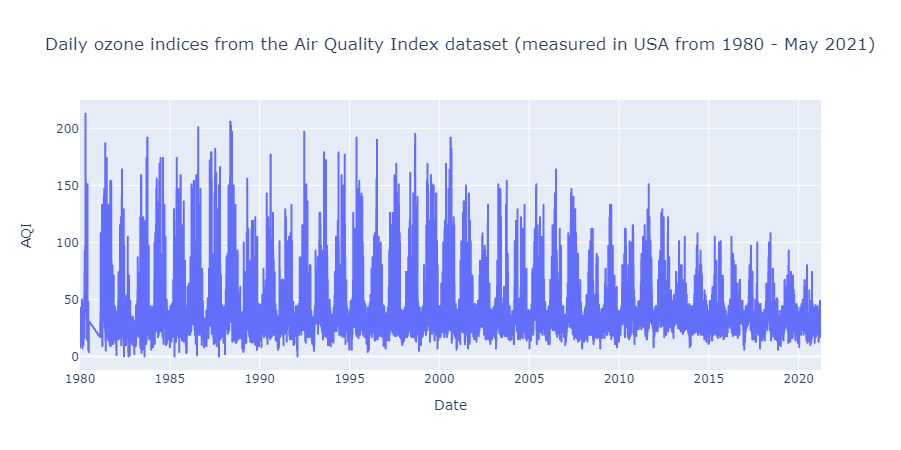

In [ ]:

import plotly.express as px
import pandas as pd

# Code mirrored from https://www.kaggle.com/code/gatandubuc/forecast-with-n-beats-interpretable-model

ozone_data = pd.read_csv('/kaggle/input/40-years-of-air-quality-index-from-the-epa-daily/aqi_daily_1980_to_2021.csv')
ozone_data = pd.pivot_table(ozone_data.query('`Defining Parameter`=="Ozone"')[['State Name','AQI', 'County Name', 'Date']],
               index='Date', columns=['State Name', 'County Name'])

ozone_data2 = ozone_data.loc[:, ozone_data.notna().sum().sort_values().index[-1] ].dropna()
data_to_plot = ozone_data2.to_frame().reset_index()
data_to_plot.columns = ['Date', 'AQI']

fig = px.line(data_to_plot, x='Date', y='AQI',
              hover_data={"Date": "|%B %d, %Y"},
              title='Daily ozone indices from the Air Quality Index dataset (measured in USA from 1980 - May 2021)')
fig.show()



## 1.1 Input data ($X$)

**Forecasting** involves making prediction(s) for a future time-point when given some historical data $X$.

$X$ may be a series of measurements, each of which denoted as $X_t$, which may be:
- **A single measure**, e.g. total usage of electricity at a residence, daily measure of ozone index see example [figure](#ts_ozone)
- **A vector that may be archived in tabular data format**, e.g. age, heart beat, oxygen saturation measured at time of hospital admission
- **Structured data**, e.g. three-dimensional ultrasound scan
- **$n$-dimensional digital signal**, e.g. underwater sound recordings of whales

Depending on the contexts of the forecasting task, one may also lead to **prognostic questions**:
- An example *industry application* includes fault prediction: how many hours of utility before a lightbulb goes out?
- In *healthcare*, doctors might need to calculate the  chance of infection after performing a surgery on their patients and devise treatment plans accordingly.


![image](https://wires.onlinelibrary.wiley.com/cms/asset/e9e35195-4503-4c46-8017-d09942140779/widm1475-fig-0003-m.png)

Image source: [Meisenbacher et al. 2022](#ensemble)


### Characteristics of inputs

One may describe a time-series with a dozen of terms...

**Lag** which can be identified by calculating the correlation between two subsequences $X_p$, $X_q$ so that $X_p$ is a lag of $X_q$ if their correlation is higher than a given threshold.

**Seasonality** trends with start and end. An example is shown in the third plot of above figure.

**Stationarity** is often confused with cycles, but they are recurring patterns that do not have a clear start nor clear end. Examples are shown in plots (b) and (g) in the figure below.

A type of **noise** that we often hear is white noise, i.e. the "buzzing" background sound that has no meaning.

To stay in scope with our objectives, we use the figure below to elaborate more on the interpretations of these descriptors. The figure is borrowed from an excellent [online  textbook on forecasting by Professor Hyndman](https://otexts.com/fpp3/stationarity.html) which we refer interested readers to review for more details.

<div>
<img src="https://otexts.com/fpp3/fpp_files/figure-html/stationary-1.png" />
    <p>Figure from online textbook <a href="https://otexts.com/fpp3/stationarity.html">"Forecasting: Principles and Practice", by Professor Hyndman 2023</a>
    </p>
</div>

## 1.2 Output / Outcome being predicted ($X_{t+1}$)

The prediction ($X_{t+1}$)  may be expressed as:
1. A point-estimate;
2. A prediction interval (uncertainty of the prediction can be inferred);
3. A probability distribution.

An example for each of the above is, respectively:
- What is the afternoon temperature tomorrow?
- What is the minimum and maximum values for the predicted temperature?
- What is the probability of getting a range of temperature values?

e.g.
| ... | 24&deg;C | 25&deg;C | 26&deg;C | ... |

## 1.3 Naive forecasting methods <a id="naive"></a>

The simplest strategy to predict weather tomorrow is based on the weather today: high chance of a sunny weather tomorrow if it has not rained today [s](#book).

A natural extension is to use a **moving window**: we predict the morning temperature tomorrow by averaging the temperature over the last $w$ days, where $w$ is known as the length of the **time window**.

Another naive method is known as the **random walk** method that employs the last observation as the prediction [(Meisenbacher et al. 2022)](#ensemble).

# 1.4 Common time-series analysis tasks

- **Classification**: this is self-explanatory; it answers questions as:
    > Is a sound recording capturing the call of a wolf, or the call of a dog?
- **Extrinsic regression** [(Foumani et al. 2023)](#extrinsic_reg): the values to be predicted are numeric instead of categorical.
- **Spatial-temporal forecasting** to predict outcomes of multiple units; e.g. to predict the energy consumption of each node of an electricity grid, or to predict measurements collected at GPS-enabled buoy stations atop ocean surface.
- **Discovery of motifs** [(Law 2019)](#stumpy): to discover a recurring subsequence that appears to be an interesting patterns. Once we have found a potential motif, we may then examine its recurrence pattern such as when and how often it reappears? Motif search may be tackled through **matrix profiling** (to be discussed later).
- **Anomaly detection**: to detect a subsequence that captures an interesting and/or rare event (example figure below from temperature data).
- **Survival analysis** aims to predict the **probability of an event occurring at any given time-point in the future**. Another [notebook of mine](https://www.kaggle.com/vcolliym/survival-analysis-101/) will be devoted to this subtopic.

When the input data consists of multiple modalities, we may tackle more variants of the above tasks, as to be illustrated later when we discuss [**transformers**](#multi).

![image](https://www.climate.gov/sites/default/files/2021-08/DatasetGallery_Global-Temperature-Anomalies-Map_thumb_16x9.png)
Image source: climate.gov

# 1.5 Forecasting 101

A series of open competitions known as the **M-Competitions** started 40 years ago to achieve collaborative benchmarks produced by the research communities for different forecasting tasks [(Makridakis et al. 2020)](#m5).
- The first two competitions (M1-M2) led to evidence advocating the combination of multiple forecasting methods.
- The M3-Competition demonstrated that Brown’s Single and Gardner’s Dampen Trend **exponential smoothing** outperformed **Auto-Regressive Integrated Moving Average (ARIMA)**.
- The M4-Competition showcased that a hybrid approach of combining multiple networks outperformed simpler models
- The latest competition that just finished early in 2023 (M5) asked participants to predict 42,840 **hierarchical** time-series of 12 levels, and later found out that a winning theme is to combine different forecasting methods, such that two different algorithms may be deployed to forecast at two different levels [(Makridakis et al. 2022)](#m5b).  

The above recounts of developments in time-series forecasting highlight following key methods to be reviewed briefly.

In a nutshell, ARIMA explains a time-series using its own past values.
ARIMA can be used whenever a time-series:
1. Does not exhibit **seasonality**
2. Does not contain purely **white noise**.

To operate on ultra-long time-series, distributed ARIMA may be considered. However, to account for seasonality, one needs alternative models and may consider **Seasonality-ARIMA (SARIMA)**.

Another alternative technique is the **exponential smoothing (ES)**, which smooths a subsequence using a window function. Conceptually, by removing the noises captured by historical measurements, a forecast that takes an average of these past measurements may become more accurate predictions of future timepoints.

As explained by [Barnes et al. (2019)](#barnes), **neural networks** can separate signal from noise without:
- Assuming stationarity  
- Needing to detrend observations
- Relying on long control simulations to compute internal variability.

This makes neural network architectures very a popular alternative when the number of time-series is sufficiently large [Hyndman et al. (2018)](#textbook). This is evident in M4 where the winning solution combined a **residual network** with **attention dilated Long Short Term Memory (LSTM)**, stacked on top of a statistical model [Oreshkin et al. (2019)](#nbeats).

Interesting, most of the methods in M5 used **Light Gradient Boosting Model (LightGBM)** which performs nonlinear regression via gradient boosted trees. The winning solution employed an equal weighted combination of various LightGBMs while the second place winning solution employed N-BEATS, which is a neural network framework developed by [Oreshkin et al. (2019)](#nbeats) (to be reviewed later) in addition to their use of LightGBMs.



## 2. Getting started


**Python** packages that you may consider:
```
Arrow
AutoTS
Darts
Flint
GreyKite
Kats (Kits to Analyze TS)
Prophet
Pyflux
TSFRESH
```

And **R** packages that you may consider:
```
forecast
tsibble
TimeTk
Zoo
```



# 3. Advances from last two years

# 3.1 Data augmentation in time-series  <a id="augment"></a>

![image](https://ars.els-cdn.com/content/image/1-s2.0-S0031320322006124-gr1.jpg)

Image source: [Semenoglou et al. 2022)](#data_aug)

Scaling, rotating, flipping, and slicing a time-series are popular methods to augment a training set
[(Iglesias et al. 2023;](#gan)[ Semenoglou et al. 2022)](#data_aug). Examples of these operations are illustrated in the above figure borrowed from [Semenoglou et al. 2022)](#data_aug). Other arguably more expensive approaches include the use of Generative Adversarial Networks, as done in [(Iglesias et al. 2023)](#gan).

Very recently, [Siebert et al. (2023)](#badgers) presents one of the latest data augmentation Python package that tries to simulate quality deficits in time-series; example of deficits are:
- Outliers
- Drift
- Datasets with heavy class-imbalance

This Python package, available on their [GitHub repository](https://github.com/Fraunhofer-IESE/badgers) also works on tabular data. Below code snippets show an example usage of generating new time-series using their ```GaussianNoiseGenerator``` function.


In [1]:
try:
    from badgers.core.pipeline import Pipeline
except:
    !pip install badgers

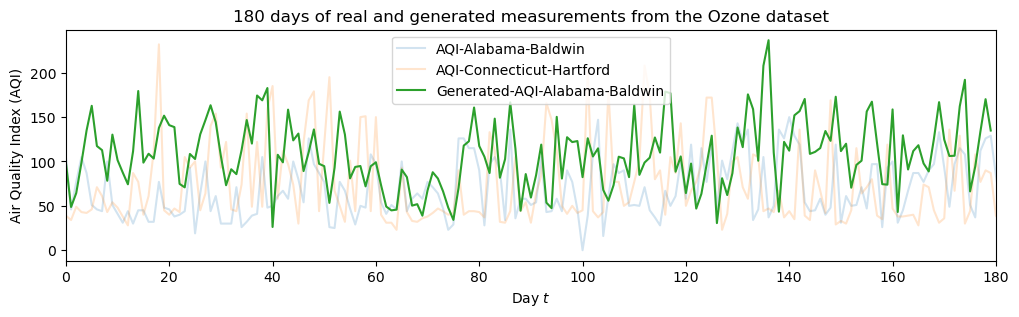

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# tabular
from badgers.generators.tabular_data.imbalance import RandomSamplingClassesGenerator
from badgers.generators.tabular_data.noise import GaussianNoiseGenerator

# time-series
from badgers.generators.time_series.noise import GaussianNoiseGenerator

from badgers.core.pipeline import Pipeline

# samples x t-dimensions
inds1=np.arange( 0, 7)
inds2=np.arange( 114, 121)
name1=ozone_data.columns[  inds1[0]]
name2=ozone_data.columns[  inds2[0]]

o1=ozone_data.iloc[ :, inds1 ].dropna()
o2=ozone_data.iloc[ :, inds2 ].dropna()

d = np.hstack( (o1.iloc[:180,:], o2.iloc[:180,:] )).T

gen = {'imbalance': RandomSamplingClassesGenerator( proportion_classes={0:0.6, 1:0.4}),
       'noise':     GaussianNoiseGenerator(noise_std=0.5) }

pipel = Pipeline(generators=gen)
X2, y2 = pipel.generate( d,  np.array([0]*7+7*[1] ).squeeze() )
X2 = X2.squeeze()
if y2[0]==0:
    na='Generated-'+'-'.join(name1)
else:
    na='Generated-'+'-'.join(name2)

fig = plt.figure( figsize=(12, 3))
plt.plot(o1.iloc[:,0].values, alpha=.2, label='-'.join(name1) );
plt.plot(o2.iloc[:,0].values, alpha=.2, label='-'.join(name2) );
plt.plot(X2[0], label= na );
plt.legend();
plt.xlim( [0,180] );
plt.ylabel( 'Air Quality Index (AQI)')
plt.xlabel( 'Day $t$')
plt.title( '180 days of real and generated measurements from the Ozone dataset' );


# 3.2 Faster computations

## Nowcasting via ```ROCKET```

**Convolutional kernels** capture features by producing large output values when the kernel matches a subsequence of a time-series. Accordingly, training convolutional neural networks (CNNs) entails presenting training samples such that the set of kernel weights will progressively emerge to local patterns of the training samples.

More specifically, a kernel convolves with an input time-series $X$ via a dot production operation done through a sliding window approach and typically is simply a one-dimensional vector with these parameters:
- **Length** of kernel ($s$)
- **Dilation** ($d$) governs the spread of a kernel; weights in a kernel are convolved with every $d$th element in $X$
- **Padding** appends zeros to $X$
- **Bias** can be sampled from a uniform distribution.


For fast and accurate time-series classification, [Dempster et al. (2020)](#rocket) proposed a method named **RandOm Convolutional KErnel Transform (ROCKET)** which employs a random set of kernels that differ by random kernel length, dilation, and padding.

In a later work, the authors found that a smaller set of special kernels will be sufficient. The secret is using a kernel with a fixed length of $l=9$ that are random configurations of two unique numeric values, e.g. $[1., 0.2, 0.2, 0.2, 1., 0.2, 0.2, 0.2, 1.]$.

For $k$ kernels, ROCKET generates features of dimensions $2k$ and completes $k\times n \times l$ steps where:
- $k$ is the number of random kernels
- $n$ is the number of time-series to be transformed
- $l$ is the length of each of time-series

In contrast, a Shapelet transform takes $n^2 \times l^4$ steps.

[Ahmed et al. (2020)](#rocket_weather) applied ROCKET to detect severe weather using lightning data collected from the Geostationary Lightning Mapper and Advanced Baseline Imager’s (ABI) visible image sequences (1500 $\times$ 2500 pixel in the infrared, near-infrared, and visible spectrum that transmitted data every 5 minutes).

Their model first predicted the next video frame (i.e. $X_{t+1}$ is an image frame) using a **convolutional recurrent autoencoder**:
- where the encoder is a 2D CNN that compressed data into lower-dimension 2D frame sequences which were then fed into...
- recurrent unit built of three chained GRUs

The predicted image frame is then fed into time-series classification module that would predict event classes such as tornadoes, severe hail, etc. Thanks to ROCKET, their approach is efficient enough to enable *time-constrained now-casting* (predictions made within 15-30 minutes prior to a weather event).

## Fast time-series labeling via ```STUMPY``` <a id="motif"></a>


**Matrix profiling** is often used to characterize subsequences of a time-series. For a given  subsequence denoted as $x_p$, the procedure aims to find its nearest neighbour subsequence $x_q$ in the entire time-sequence it originates from.

The calculation progress of finding nearest-neighbours can be done naively with two for-loops as the above animation suggests but such naive implementation is not scalable. To alleviate computational bottlenecks, a Python package ```STUMPY```  can be used to  compute exactly (or approximate) the nearest-neighbour calculations within $l^2$ steps, where $l$ is the length of the time-series being analyzed [(Law, 2021)](#stumpy).



In health care applications [(Reed et al., 2022)](#matrix_prof), matrix profiling has enabled disease modelling. An example application in climate research is illustrated by Saha et al. [(2022)](#saha) who performed time-series labeling via matrix profiling and compared it against approaches based on LSTM and SARIMA.

Their test and evaluation datasets include:
- Bitcoin dataset available on Kaggle was used for internal-validation
- PM2.5 dataset (from Kolkata, India)
- PM10 dataset (from Kolkata, India)
- Temperature dataset from Kolkata, India (also available on Kaggle)

Based on experimental findings, they conclude that their approach of using matrix profiling has improved performance by 25%.


<br>

<div>
<img src="https://github.com/TDAmeritrade/stumpy/blob/main/docs/images/stumpy_demo.gif?raw=true" />
    <p>Animation source: Github.com/TDAmeritrade/stumpy <a href="stumpy">(Law, 2019).</a></p>
</div>

## Neural Basis Expansion Analysis (N-BEATS)



Developed by [Oreshkin et al. (2020)](#nbeats), N-BEATS is a highly efficient deep learning model that uses two residual stacks of fully connected layers, stacked on top of statistical models. For interested readers, a demo notebook was prepared elegantly by @gatandubuc [in a Kaggle notebook](https://www.kaggle.com/code/gatandubuc/forecast-with-n-beats-interpretable-model) that explores how N-BEATS can be used to examine changes in temperature and daily ozone indices.

As explained by the developers, N-BEATS is an instance of meta-learning with outer and inner learning procedures. Their method has been deployed to forecast mid-term electricity load in a later work [(Oreshkin et al., 2021)](#eload) where they showed statistically significant gain in forecast accuracy over ARIMA and exponential smoothing (ES).

Another side note is the benchmarking results they presented. They compared a hybrid approach that combined for instance:
- $k$-nearest neighbour weighted regression to forecast yearly cycles    
- Fuzzy neighbourhood model to forecast yearly cycles   
- Exponential smoothing that would forecast yearly loads and dispersons


Below figures show their N-BEATS and comparative analysis results.
<div style="border-style: dotted; margin: 1em; padding: 1em">
    <img  style="margin: 1em" src="https://ars.els-cdn.com/content/image/1-s2.0-S0306261921003986-fx1_lrg.jpg" width="500px"/>
    <img src="https://ars.els-cdn.com/content/image/1-s2.0-S0306261921003986-gr7_lrg.jpg" width="500px"/>
    <p>Source of the images: <a href="#eload">Oreshkin et al. (2020)</a></p>
</div>    




<a id="ts_ozone"></a>


# 3.3 Data fusion with transformers <a id="multi"></a>

As reviewed in [another Kaggle essay](https://www.kaggle.com/code/kkiryll/generative-ai-rise-of-the-transformers), two essential components behind transformers are:

1. **Self-attention** involves calculating a score that measures how subsequences are similar to each other and attributes a high attention score when two subsequences are likely to be close neighbours. It is an elegant way to provide contextual information that conveys that a subsequence $x_p$ is *more* related to $x_q$ than $x_r$.

2. **Positional encoding** is used so that transformers can recognize how subsequence $B-C-D$ is different from a subsequence $D-B-C$. This is needed because the sequential relationships between subsequences are gone once they passed through self-attention calculations.

[Civitarese et al. (2021)](#transformers) applied a variant of the **temporal fusion transformer model** to predict extreme precipitation that may cause flooding and crop damages.

Their multi-modal dataset consisted of a set of forest measurements:
- Non-gridded data: temperature at 2m, geopotential height at 500 mbar, and soil moisture.
- Daily gridded data with spatial resolution of 0.05&deg;C (known as CHIRPSv2)
- Gridded data with spatial resolution of 0.25&deg;C (known as ERA5).

... which corresponded to three modalities (types) of inputs that they fuse via three branches:
- *Historical*: actual observed values; e.g. temperature or soil moisture
- *Static*, which remains unchanged over time; e.g. month, latitude and longitude
- *Future*: year-of-the-month and external variables such as temperature.

Their inputs were first fed into two embedding layers (L1), one for each set of the real and categorical time-series. The outputs of L1 are then fed separately into modality-specific encoders. Outputs of the encoders of the *static* branch are filtered so that time-invariant features will be fed into the next layer. To mine short temporal relationships, a sequence-to-sequence LSTM module is used. Further, a mult-head attention block is used to capture long-term dependencies.



# 3.4 Approaches to hybridization <a id="ensembling"></a>

As alluded to earlier when we discussed the M-competitions, hybridization refers to combining different models [(Meisenbacher et al. 2022)](#ensemble), and the variants can be gropued into three approaches:
- **Ensembling** fed all input data into different foecasting models in the same manner and compute the final forecast as some form of weighted average.
- **Preprocessing-based** first decompse time-series into components and then process each component separately and finally fed into a single model afer recomposing.
- **Sequential** first use statistical forecasting method(s), followed by deep learning followed (e.g. exponential smoothing and then recurrent neural network).  
  
Strategies to find the best hybridization include [(Meisenbacher et al. 2022)](#ensemble):
- Heuristics composed of a fixed set of rules; example:
    - Naive forecasting approaches ([see section 1.3](#naive)) may be used when only small amounts of data is available ($n~600$)
    - Neural networks may be deployed when $n>2600$
- Empirical experiments such as the use of cross-validation
- Train a model that selects optimal forecasting method(s) by using, for example, out-of-sample errors derived from a decision tree.

In their meta-analysis, [Meisenbacher et al. (2022)](#ensemble)] observed that 27 articles employed statistical forecasting methods only while 24 other ones employed  only machine learning methods, and 16 articles employed both.
They recommend neural architecture search and meta-learning for automating the search of hybrid forecasting methods, albeit large-scale benchmark is pending to evaluate their hypothesis.


# 3.5 Explainable AI (XAI) <a id="xai"></a>

In climate research [(Bommer et al. 2023)](#xai), the use of XAI helps to:
- Validate a framework
- Provide new insights about possible physical processes that reflect seasonality in precipitation and sub-seasonal drivers of climate change.
- Compare multiple climate models

Some flavours of XAI strategies include...

## Gradient-based:

- **Input-Gradient** assigns a high score to a variable if signal is present in a subsequence and the model network responses to the signal.

- **Integrated-Gradients** computes the difference between an explanation with a signal and that without signal.

- **Layer-wise Relevance Propagation (LRP)** feeds the model's prediction backwards to compute relevance scores for each variable via **back-propagation procedure** based on different rules, e.g.:
    - $\alpha-\beta$ rule: all positive activations of neurons in the previous layer are weighted
    - **z-rule** calculates weights using both negative and positive activations
    - These calculations are done *backwards*, starting from the output layer, and *propagate* these calculations in a *backward*, layer by layer fashion

## Noise-based

- **Smooth-Grad** adds multiple versions of random noise to the inputs to produce a set of model explanations that are then averaged. Noise-induced flunctuations will suppress background noise in the time-series and highlight signals in the inputs.

- **Noise-Grad** perturbs model weights instead of the inputs to estimate the uncertainties induced by both the inputs and the model.

- **Fusion-Grad** combines NoiseGrad and SmoothGrad.

## Latest XAI applications in climate research


### Attention heatmap via Layer-wise Relevance Propagation (LRP)

[Borujeni et al.](#xai_pollution) extended the *Layer-wise Relevance Propagation (LRP)* technique to be deployed with a **gated recurrent unit (GRU)** network, in order to obtain heatmaps that show response levels of four air pollutants, namely, PM10, NO$_2$, NO, O$_3$. Their framework helped them identify critical temporal and meteorological factors responsible for these air pollutants.


### Attention heatmap via gradient-based methods

**Gradient-based method** approximates the local gradient of $X_{t+1}$ (the output prediction) relative to $X$ (inputs).

We illustrate one application in the context of the article by [Diffenbaugh et al. (2023)](#simulated_data) who employed spatial patterns of temperature observations to predict time-to-critical-thresholds of the tipping point (see Introduction).

Using observed patterns of annual temperature anomalies as inputs to a neural network, they sought to predict time-to-climate-thresholds for different parts of the world.

Their network has two hidden layers, each of 25 units, and outputs two values representing the mean and standard deviation of a conditional Gaussian distribution.  Examination of the validation and test predictions as shown in the Appendix of their article affirms the validity of the uncertainty estimates.

Their approach is highly innovative and distinctive from prior studies in the sense that their neural networks were only trained on simulated data generated from climate models. Based on empirical results, they observed that the time-to-threshold estimations are consistent with previous studies.

Furthermore, using "gradient multiplied by input" [(Shrikumar et al., 2017)](#heatmap) to identify geographic regions, their model projected that many regions will likely experience shorter time-to-thresholds and helped confirm that global warming is on the verge of crossing the critical threshold and that unfortunately means a high chance of high-impact climate changes happening "over the next three decades".


### eXtreme Gradient Boosting (XGBoost) + SHapley Additive exPlanations (SHAP) approach

To examine the effects of cooling energy consumptions $E$ on climate change, [Chakraborty  et al. (2021)](#cooling) proposed to predict $E$ using  XGBoost, an ensemble method that has high model interpretability and scalability to large-scale datasets. In a nutshell, the objective of XGB is to incrementally enlarge an ensemble of trees. Similar to decision trees, each observation is passed down the tree where each leaf represents an output prediction with confidence denoted by $w$. The final prediction is calculated as a sum of the predictions made at all leaf nodes.

The authors conducted ablation studies that include comparison with other popular machine learning algorithms, e.g.:
- Support vector machine
- Random forest
- LSTM

Further, they explained their predictions using SHAP, which works by examining how each variable impacts the accuracy of prediction. Their overall framework can predict climate scenarios with $R^2>0.9$.




# Discussion

# - Recap

We have reviewed the basics of time-series data and their applications that include fusing them with tabular data and heterogenous data types such as the use of:
- Multi-modal transformers operating on **hierarchical** forest measurements to predict precipitation
- N-BEATS for probablistic forecasting of electricity loads
- Matrix-profiling with STUMPY for efficient time-series labeling
- ROCKET for nowcasting severe weather using image sequences.

We also examined latest climate and pollution research illustrating XAI applications in the contexts of:
- XGBoost + SHAP for predicting energy consumptions by buildings
- GRU + LRP for understanding air pollutants
- MLP + Input-Gradients to generate regional maps that project time-to-critical climate threshods.

<!-- | LightGBM |  attention dilated Long Short Term Memory | (Mini) ROCKET | STUMPY | -->

Cross-examining the presented techniques with discussion posts and solution write-ups found on Kaggle using the [Meta Kaggle dataset](#meta), we gauged their relative popularities with interactive plots shown in my [second notebook](https://www.kaggle.com/code/vcolliym/common-themes/). Inspecting the competition titles, we observe that XAI and data augmentation techniques were discussed for time-series data in only a handful of posts.

On a broader level, ML and climate researchers continue to explore new applications of XAI as well as developing rigourous procedures that ensure the "add-ons" needed by XAI will exhibit desirable properties, such as those done by [Diffenbaugh et al. (2023)](#simulated_data) and [Borujeni et al. (2023)](#xai_pollution), who, for instance, validate the correctness of heatmap calculations by conducting experiments to measure the consistency of the heatmaps computed under various settings.

In taking this further, [Bommer et al. (2023)](#xai) recently conducted a benchmark that examined desirable properties of XAI methods. Using data simulated by the [general climate model (CESM1)](https://www.cesm.ucar.edu/community-projects/lens/data-sets) and neural networks to map yearly temperature maps to categorical maps, they benchmarhed various algorithms and derived metrics that measure desirable properties such as:
- **Complexity** that quantifies how concise the explanations are.
- **Robustness**, to ensure that small changes in the inputs will give explanations that remain stable
- **Faithfulness**, to ensure that "noise"-corrupting highly relevant variables will result in high reduction in forecast performance

In their experiments based on MLP and CNN, they found that:
- XAI methods that involve the inputs (e.g. Input-Gradients and specific variants of LRP) achieved favourable robustness, faithfulness, and complexity but at the cost of being susceptible to randomization effects induced by decision boundaries and model parameters.
- This was true regardless of type of model.
- The converse is true for gradient-based methods (e.g. Smooth-Grad, Noise-Grad, Fusion-Grad).
- Perturbation of inputs by noise did not improve robustness, faithfulness, and complexity of a given XAI method.

Future research using real datasets is needed to test on more machine learning frameworks.

We next showcase how experiences working with Kaggle datasets and competitions may push forward the attainment of sustainable development goals in the future to come.

# - How did research communities benefit from each other?

## Towards understanding interplay between climate, agriculture, and urban growth

The National Oceanic and Atmospheric Administration (NOAA) is a government agency based in Washington, D.C. that has hosted various data science competitions on Kaggle with long-term results (see next section). NOAA also posted a dataset called *Global Surface Summary of the Day* (GSSD), which consists of daily temperature data collected over 9000 weather stations around the globe.
- The validity of the GSSD dataset has been examined in a recent article where Lavigne & Li [(2022)](#noaa) explained the importance of data scrutiny and cleansing.
- After excluding stations with abnormal changes in the fog day reports, the authors observed that warming conditions around the world impact annual fog day over different regions in non-consistent ways.
- In summary, this study on a high level has enriched the understanding of the impact of fog on crop yields, vegetation as well as management of water utilization and regional transportation safety.

The United Nations also has posted several datasets, including the "Greenhouse Gas Inventory Dataset" that contains attributes on anthropogenic emissions by sources, such as carbon dioxide, methane, etc. The dataset has used by Ravi et al. [(2020)](#gg_gas).


## Towards monitoring and improving quality of drinking water

The Indian water Quality (IWQ) dataset consists of six measurements taken from 1991 water samples surveyed from rivers in various states of India during 2003-2014. Using this dataset, [Hoque et al. (2022)](#iwq) benchmarked six regression algorithms to regress water quality index from the six measurements in the IWQ dataset and found that linear regression and ridge regression outperformed more advanced algorithms such as extra tree regression, random forest, and support vector regression.

Another research group led by [Yusri et al.](#iwq2) examined binary classification of water quality instead of regression on quality indices. Using a five-fold cross-validation experiment, they found that eXtreme Gradient Boosting achieved mean accuracy score of 90% while support vector machine achieved 65% in mean accuracy.

## Promoting sustainable development goals & driving analytical innovations through  Kaggle competitions

Kaggle also stimulates analytical innovations that advance the development of a sustainable future.

In the [Environmental Insights Explorer competiton](https://www.kaggle.com/competitions/ds4g-environmental-insights-explorer/overview), participants were asked to derive methods that can compute the average emissions factor of electricity generated from a region using remote sensing data.
- The [winning solution](https://www.kaggle.com/code/katemelianova/ds4g-spatial-panel-data-modeling/notebook) examined sources of NO2 in the atmosphere with statistical procedures that account for confounding factors.
- [Another winning solution ](https://www.kaggle.com/niyamatalmass/1-introduction-to-the-solution-of-dsg-eie) focused on NO2 emission from a single production plant.


In the [Unlocking Climate Solutions](https://www.kaggle.com/competitions/cdp-unlocking-climate-solutions/overview), participants were asked to propose key performance indicators that would examine a city in terms of water security, deforestation, climate change, and social inequality. The challenge's textual dataset involved disclosures on climate change actions published by corporates and government bodies.

To illustrate, the challenge's demo notebook suggested users several directions:
- identify key themes in the disclosures using natural language processing (via term frequency-inverse document frequency);
- examine how government bodies perceive individual environmental issues as a concern or an opportunity using sentiment analysis and create metrics that would have identify cities who will be proactive in adopting environmental measures;
- and water price coefficient that would quantify a corporate's social impact and environmental risks brought to its city.

The top three winning submissions included notebook visualizations that:
1. Classified cities by novel indices to inform users how climate change will impact water potability;
2. Identify mutually beneficial new partnerships between cities/ corporations (via graph theory and structural topic modeling); and
3. Rank countries according to their current performance and future potentials by examining water efficiency in terms of geospatial contexts.




# Conclusions

This report started with recent examples of massive degradations to the world’s ecosystems, from both natural or manmade disasters, all of which demand our immediate attention and global efforts to take actions.

For most ordinary people including myself, the writer, I have these suggestions to kick-start climate actions:
1. Bike or walk to work
2. Bring our own mugs to workshops and conferences, not just office meetings
2. Dine-in instead of take-outs, or better, prep your own dinner
3. Consider alternatives to our bubble-tea and St*rbucks ice coffee straws and plastic cups?
4. Ask if a grocery receipt must be printed?
5. ...

We could obviously compose a collective Kaggle listicle with this.

The important point is that these are small favours we *can* do right now for our Planet Earth.

While they are baby-elephant steps, we must remember the collective power we bring.

And if everyone adopts sustainable practices, we have greater hopes of bringing these practices to our workplaces (which, for instance, will facilitate more water-cooler conversations after biking to work) and spreading the message to all our social and family networks. We will collectively feel more motivated to push forward sustainable actions.


And last week (July 15, 2023), [Markus Pukonen](https://beachmetro.com/2023/07/15/beacher-markus-pukonen-completes-motor-free-circumnavigation-of-the-globe-eight-years-after-paddling-out-into-lake-ontario/) finished his **"non-motorized circumnavigation of the planet", without putting a step on any airplane, jet, train, automobile... Not even a single elevator!**


> ...shrinking my ecological footprint and learning more about social and environmental justice issues. I started to feel like that wasn’t enough and that I needed to do more to help.

Without the help of air-balloons, his travel could not be finished in 80 days, but it was still possible thanks to the countless bikes, canoes, paddleboards, ... and his **perseverance**.

> What I am doing is inspiring the public and students at presentations and connecting with local non-profit organizations to share their stories and raise support for them.


Hope this true story will bring you inspirations today. Cheers!

<br>

![Markus Pukonen on a SUP.](https://s3.amazonaws.com/www.explorersweb.com/wp-content/uploads/2023/07/08055619/SUP.jpg)

Markus Pukonen on a stand-up paddleboard (Source: [BeachMetro](https://beachmetro.com/2023/07/15/beacher-markus-pukonen-completes-motor-free-circumnavigation-of-the-globe-eight-years-after-paddling-out-into-lake-ontario/))

**References**

1. The Associated Press (July 9, 2023) Backlash builds as Japan prepares to release wastewater from Fukushima nuclear plant https://www.npr.org/2023/07/09/1186677021/japan-fukushima-nuclear-plant-wastewater-release
<a id="korea"></a>

1. Ahmed, N., Slipski, M. M., Venzor-Cárdenas, I., Molina, M. J., Sénay, G., Cheung, M., ... & Renard, G. (2020). Leveraging Lightning with Convolutional Recurrent AutoEncoder and ROCKET for Severe Weather Detection. In AI for Earth Sciences Workshop at NeurIPS.
<a id="rocket_weather"></a>

1. Athanasopoulos, G., Hyndman, R. J., Song, H., & Wu, D. C. (2011). The tourism forecasting competition. International Journal of Forecasting, 27(3), 822-844.
<a id="tourism"></a>

1. Barnes, E. A., Hurrell, J. W., Ebert‐Uphoff, I., Anderson, C., & Anderson, D. (2019). Viewing forced climate patterns through an AI lens. Geophysical Research Letters, 46(22), 13389-13398.
<a id="barnes"></a>

1. BenDriss, H., Chakir, E. M., El Bakkali, J., & Doudouh, A. (2022). InterDosi Monte Carlo study of radiation exposure of a reference crab phantom due to radioactive wastewater deposited in marine environment following the Fukushima nuclear accident. Radiation and Environmental Biophysics, 61(4), 623-629.
<a id="crab"></a>

1. Bommer, P., Kretschmer, M., Hedström, A., Bareeva, D., & Höhne, M. M. C. (2023). Finding the right XAI method--A Guide for the Evaluation and Ranking of Explainable AI Methods in Climate Science. arXiv preprint arXiv:2303.00652.
<a id="xai"></a>

1. Bui, D. T., Khosravi, K., Tiefenbacher, J., Nguyen, H., & Kazakis, N. (2020). Improving prediction of water quality indices using novel hybrid machine-learning algorithms. Science of the Total Environment, 721, 137612.
<a id="iwq"></a>

1. Civitarese, D. S., Szwarcman, D., Zadrozny, B., & Watson, C. (2021). Extreme precipitation seasonal forecast using a transformer neural network. arXiv preprint arXiv:2107.06846.
<a id="transformers"></a>

1. Dempster, A., Schmidt, D. F., & Webb, G. I. (2023). Hydra: Competing convolutional kernels for fast and accurate time series classification. Data Mining and Knowledge Discovery, 1-27.
 <a id="rocket"></a>

1. Diffenbaugh, Noah S., and Elizabeth A. Barnes. "Data-driven predictions of the time remaining until critical global warming thresholds are reached." _Proceedings of the National Academy of Sciences_ 120, no. 6 (2023): e2207183120.
<a id="simulated_data"></a>

1. Eisenmann M, Reinke A, Weru V, Tizabi MD, Isensee F, Adler TJ, Ali S, Andrearczyk V, Aubreville M, Baid U, Bakas S. Why is the winner the best?. InProceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition 2023 (pp. 19955-19966).
<a id="eisenmann"></a>
  
1. Foumani, N. M., Miller, L., Tan, C. W., Webb, G. I., Forestier, G., & Salehi, M. (2023). Deep learning for time series classification and extrinsic regression: A current survey. arXiv preprint arXiv:2302.02515.
<a id="extrinsic_reg"></a>

1. Fuller, R., Landrigan, P. J., Balakrishnan, K., Bathan, G., Bose-O'Reilly, S., Brauer, M., ... & Yan, C. (2022). Pollution and health: a progress update. The Lancet Planetary Health, 6(6), e535-e547.
<a id="pollution_update"></a>

1. Hayashi T, Shimizu T, Fukami Y. Collaborative Problem Solving on a Data Platform Kaggle. arXiv preprint arXiv:2107.11929. 2021 Jul 26.
<a id="hayashi"></a>

1. Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice. OTexts.
<a id="textbook"></a>

1. Iglesias, G., Talavera, E., González-Prieto, Á., Mozo, A., & Gómez-Canaval, S. (2023). Data Augmentation techniques in time series domain: a survey and taxonomy. Neural Computing and Applications, 35(14), 10123-10145.
<a id="gan"></a>

4.  Labe, Z. M., & Barnes, E. A. (2022). Comparison of climate model large ensembles with observations in the arctic using simple neural networks. Earth and Space Science, 9(7), e2022EA002348.
<a id="labe"></a>

3. Law, S. (2019). STUMPY: A Powerful and Scalable Python Library for Time Series Data Mining. Journal of Open Source Software, 4(39), 1504.
<a id="stumpy"></a>

1. Lenton, T. M. (2021). Tipping points in the climate system. *Weather*, 76 (10)
<a id="tip"></a>

1. Makridakis, S., Spiliotis, E., & Assimakopoulos, V. (2020). The M4 Competition: 100,000 time series and 61 forecasting methods. International Journal of Forecasting, 36(1), 54-74.
<a id="m4"></a>

1. Makridakis, S., Spiliotis, E., & Assimakopoulos, V. (2022). The M5 competition: Background, organization, and implementation. International Journal of  Forecasting,38(4), 1325-1336.
<a id="m5"></a>

2. Makridakis, S., Spiliotis, E., & Assimakopoulos, V. (2022). M5 accuracy competition: Results, findings, and conclusions. International Journal of Forecasting, 38(4), 1346-1364.
<a id="m5b"></a>

1. Manisalidis, I., Stavropoulou, E., Stavropoulos, A., & Bezirtzoglou, E. (2020). Environmental and health impacts of air pollution: a review. Frontiers in public health, 8, 14.
<a id="health"></a>

1. Meisenbacher, S., Turowski, M., Phipps, K., Rätz, M., Müller, D., Hagenmeyer, V., & Mikut, R. (2022). Review of automated time series forecasting pipelines. Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery, 12(6), e1475.
<a id="automated_pipel"></a>

1. Meta Kaggle. Accessed July 5, 2023  https://www.kaggle.com/datasets/kaggle/meta-kaggle
<a id="meta"></a>

1. Mirzavand Borujeni, S., Arras, L., Srinivasan, V., & Samek, W. (2023). Explainable sequence-to-sequence GRU neural network for pollution forecasting.*Scientific Reports*,13_(1), 9940.
<a id="xai_pollution"></a>

1. Nogrady, B. (2023). Is Fukushima wastewater release safe? What the science says. Nature. https://www.nature.com/articles/d41586-023-02057-y
<a id="nature"></a>

1. Oreshkin, B. N., Carpov, D., Chapados, N., & Bengio, Y. (2019). N-BEATS: Neural basis expansion analysis for interpretable time series forecasting. arXiv preprint arXiv:1905.10437.
<a id="nbeats"></a>

1. Oreshkin, B. N., Dudek, G., Pełka, P., & Turkina, E. (2021). N-BEATS neural network for mid-term electricity load forecasting. Applied Energy, 293, 116918.
<a id="eload"></a>

1. Reed, E., Fellows, A., Lu, R., Rienks, M., Schmidt, L., Yin, X.,  & Mayr, M. (2022). Extracellular matrix profiling and disease modelling in engineered vascular smooth muscle cell tissues. *Matrix Biology Plus*, 16, 100122.
<a id="matrix_prof"></a>

1. Rolnick, D., Donti, P. L., Kaack, L. H., Kochanski, K., Lacoste, A., Sankaran, K., ... & Bengio, Y. (2022). Tackling climate change with machine learning. ACM Computing Surveys (CSUR), 55(2), 1-96
<a id="survey"></a>

1. Saha, P., Nath, P., Middya, A. I., & Roy, S. (2022). Improving temporal predictions through time-series labeling using matrix profile and motifs. Neural Computing and Applications, 1-17.
<a id="saha"></a>

1. Semenoglou, A. A., Spiliotis, E., & Assimakopoulos, V. (2023). Data augmentation for univariate time series forecasting with neural networks. Pattern Recognition, 134, 109132.
<a id="data_aug"></a>

1. Shrikumar, A., Greenside, P., & Kundaje, A. (2017, July). Learning important features through propagating activation differences. In International conference on machine learning (pp. 3145-3153). PMLR.
<a id="heatmap"></a>

1. Siebert, J., Seifert, D., Kelbert, P., Kläs, M., & Trendowicz, A. (2023). Badgers: generating data quality deficits with Python. arXiv preprint arXiv:2307.04468.
<a id="badgers"></a>

1. Sivill, T., & Flach, P. (2022, May). Limesegment: Meaningful, realistic time series explanations. In International Conference on Artificial Intelligence and Statistics (pp. 3418-3433). PMLR
<a id="lime_segment"></a>

1. Tauchert C, Buxmann P, Lambinus J. Crowdsourcing data science: A qualitative analysis of organizations’ usage of kaggle competitions.
<a id="tauchert"></a>

1. Xu, L., Zhao, X. Y., & Chen, J. H. (2022). Exploring the governance dilemma of nuclear wastewater in Fukushima: A tripartite evolutionary game model. Ocean & Coastal Management, 225, 106220.
<a id="xu"></a>


# Appendix

## Technical notes

### Time-series metrics

1. Mean Absolute Percentage Error
1. Correlation
1. Euclidean distance
1. ...

![image](https://stumpy.readthedocs.io/en/latest/_images/euclidean_distance.jpeg)
